# LOAN APPROVAL STATUS PREDICTION

Imagine you are work in bank sector and bank provides loan to the customer who requires so when provides loans the is a risk whether the loan
take will repay the loan or not . so the bank have look after many aspects. so this project to predict whether loan is approved or not as per
customer profile

### Importing Required Libraries  For Execution

In [31]:
!pip install xgboost

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler

### Loading The Data Set

In [33]:
df = pd.read_csv("LoanApprovalPrediction.csv")

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Analysis Of Data

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [36]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [37]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents            True
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [38]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
df['Gender'].value_counts()

Male      487
Female    111
Name: Gender, dtype: int64

In [40]:
df['Married'].value_counts()

Yes    388
No     210
Name: Married, dtype: int64

In [41]:
df['Dependents'].value_counts()

0.0    338
1.0    101
2.0     99
3.0     48
Name: Dependents, dtype: int64

In [42]:
df['Education'].value_counts()

Graduate        465
Not Graduate    133
Name: Education, dtype: int64

In [43]:
df['Self_Employed'].value_counts()

No     488
Yes    110
Name: Self_Employed, dtype: int64

In [44]:
df['ApplicantIncome'].value_counts()

2500    9
2600    6
6000    6
4583    6
3333    5
       ..
3975    1
3244    1
4408    1
3917    1
7583    1
Name: ApplicantIncome, Length: 491, dtype: int64

In [45]:
df['CoapplicantIncome'].value_counts()

0.0       265
1666.0      5
2083.0      5
2500.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 283, dtype: int64

In [46]:
df['LoanAmount'].value_counts()

120.0    20
110.0    16
100.0    15
187.0    12
128.0    11
         ..
72.0      1
240.0     1
214.0     1
59.0      1
253.0     1
Name: LoanAmount, Length: 199, dtype: int64

In [47]:
df['Loan_Amount_Term'].value_counts()

360.0    500
180.0     43
480.0     14
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [48]:
df['Credit_History'].value_counts()

1.0    463
0.0     86
Name: Credit_History, dtype: int64

In [49]:
df['Property_Area'].value_counts()

Semiurban    225
Urban        198
Rural        175
Name: Property_Area, dtype: int64

### Data Visualization

C:\Users\ismail\AppData\Local\Temp\ipykernel_7224\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

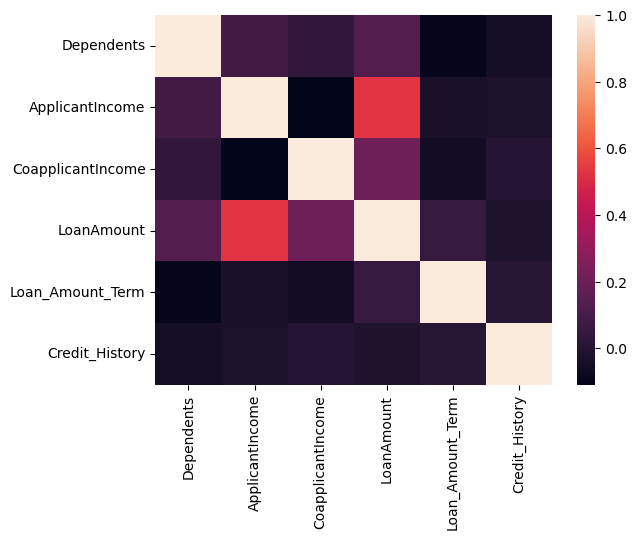

In [50]:
sns.heatmap(df.corr())

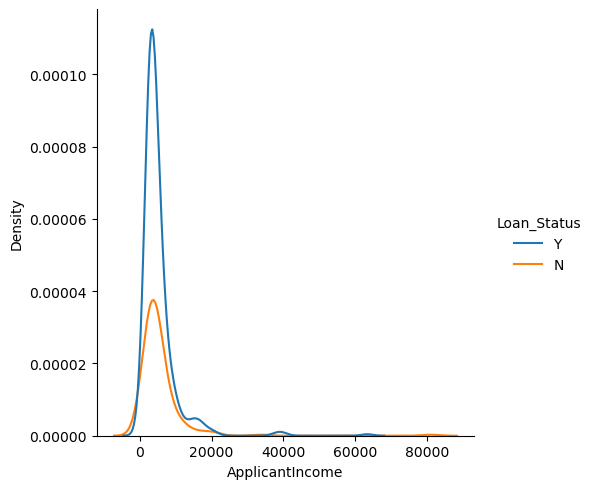

In [51]:
sns.displot(df,x='ApplicantIncome',hue='Loan_Status',kind='kde')

Visualize all the unique values in columns 

<Axes: xlabel='Married', ylabel='count'>

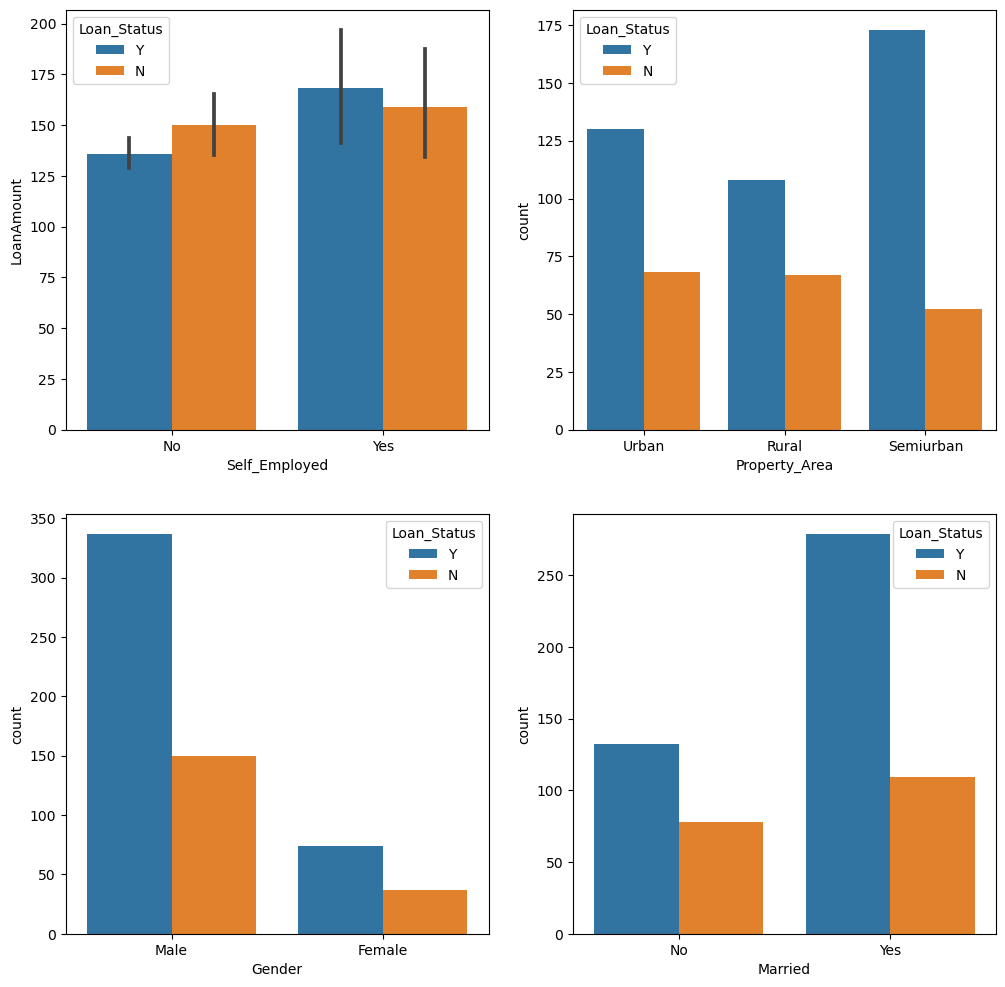

In [52]:
fig,axis=plt.subplots(2,2,figsize=(12,12))
sns.barplot(x='Self_Employed',y='LoanAmount',data=df,hue='Loan_Status',ax=axis[0,0])
sns.countplot(x='Property_Area',data=df,hue='Loan_Status',ax=axis[0,1])
sns.countplot(x='Gender',data=df,hue='Loan_Status',ax=axis[1,0])
sns.countplot(x='Married',data=df,hue='Loan_Status',ax=axis[1,1])

# Data Cleaning And Preprocessing

In [53]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Drop the "Loan_ID" column as it is unique and unrelated to the other columns in the dataset

In [54]:
# Dropping Loan_ID column
df.drop(['Loan_ID'],axis=1,inplace=True)

As all the categorical values are binary so we can use Label Encoder for all such columns.

In [57]:
label_encoder = LabelEncoder()
lst=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in lst:
    df[i]=label_encoder.fit_transform(df[i])

In [58]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [62]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [63]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [64]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [65]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### Data Set Balancing

In [69]:
LoanStatus =df['Loan_Status'].value_counts()

In [70]:
Loan_Status

1    411
0    187
Name: Loan_Status, dtype: int64

In [71]:
binary=['Yes','No']

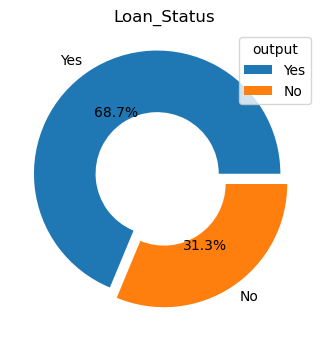

In [72]:
plt.figure(figsize=(4,4))
plt.pie(LoanStatus,explode=[0.1,0],labels=binary, autopct='%2.1f%%',wedgeprops={"width":0.5})
plt.title('Loan_Status')
plt.legend(title='output')
plt.show()

In [76]:
data = df.copy()

In [77]:
#Target
Y=data['Loan_Status']
#Features
X=data.drop(columns='Loan_Status',axis=1)

In [78]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
593    1
594    1
595    1
596    1
597    0
Name: Loan_Status, Length: 598, dtype: int32

In [79]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
594,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
595,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
596,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


### Scalling The Features

In [80]:
ms=MinMaxScaler()

In [81]:
X_new=ms.fit_transform(X)

In [82]:
X_new

array([[1.        , 0.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       [1.        , 1.        , 0.25      , ..., 0.74358974, 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.25      , ..., 0.74358974, 1.        ,
        1.        ],
       [1.        , 1.        , 0.5       , ..., 0.74358974, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.74358974, 0.        ,
        0.5       ]])

### Spliting The DataSet

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X_new,Y,test_size=0.2,random_state=45)

### Model Creation

1. KNeighborsClassifier
2. svc
3. Naive Bayes
5. DecisionTree
6. AdaBoostClassifier
7. GradientBoosting
8. XGBClassifier

In [107]:
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC()
nb=GaussianNB()
dc=DecisionTreeClassifier(criterion='entropy')
ad=AdaBoostClassifier()
gr=GradientBoostingClassifier()
xg=XGBClassifier()

In [108]:
score=[]

In [109]:
models=[knn,svm,nb,dc,ad,gr,xg]

In [110]:
for model in models:
    print('-'*25,model,'-'*25)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(classification_report(y_test,y_pred))
    model_score=accuracy_score(y_test,y_pred)*100
    print("Score model = {}".format(model_score))
    score.append(model_score)

------------------------- KNeighborsClassifier() -------------------------
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        48
           1       0.69      1.00      0.82        72

    accuracy                           0.73       120
   macro avg       0.85      0.67      0.66       120
weighted avg       0.82      0.73      0.69       120

Score model = 73.33333333333333
------------------------- SVC() -------------------------
              precision    recall  f1-score   support

           0       1.00      0.35      0.52        48
           1       0.70      1.00      0.82        72

    accuracy                           0.74       120
   macro avg       0.85      0.68      0.67       120
weighted avg       0.82      0.74      0.70       120

Score model = 74.16666666666667
------------------------- GaussianNB() -------------------------
              precision    recall  f1-score   support

           0       1.00      

### Data Frame Of Accuracy Of Each Model

In [111]:
score

[73.33333333333333,
 74.16666666666667,
 75.0,
 61.66666666666667,
 75.0,
 68.33333333333333,
 71.66666666666667]

In [112]:
Algorithm=[' KNeighborsClassifier','svc','Naive','DecisionTree','AdaBoostClassifier','GradientBoosting','XGBClassifier']
Accuracy=score
Data=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy},index=[1,2,3,4,5,6,7])
Data.style.highlight_max(subset='Accuracy',color='lightgreen')

,Algorithm,Accuracy
1,KNeighborsClassifier,73.333333
2,svc,74.166667
3,Naive,75.000000
4,DecisionTree,61.666667
5,AdaBoostClassifier,75.000000
6,GradientBoosting,68.333333
7,XGBClassifier,71.666667


### Inbalanced Dataset Handling Using SMOTEENN

In [113]:
sm=SMOTEENN(random_state=1)
X_sm,y_sm=sm.fit_resample(X_new,Y)

1    226
0    224
Name: Loan_Status, dtype: int64


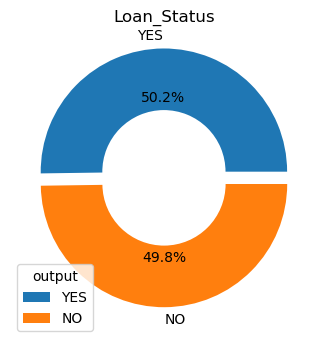

In [115]:
LoanStatus1=y_sm.value_counts()
print(h1)
binary=['YES','NO',]
plt.figure(figsize=(4,4))
plt.pie(LoanStatus1,explode=[0.1,0],labels=binary, autopct='%2.1f%%',wedgeprops={"width":0.5})
plt.title('Loan_Status')
plt.legend(title='output')
plt.show()

In [116]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,y_sm,test_size=0.2,random_state=45)

In [121]:
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC()
nb=GaussianNB()
dc=DecisionTreeClassifier(criterion='entropy')
ad=AdaBoostClassifier()
gr=GradientBoostingClassifier()
xg_bal=XGBClassifier()
score1=[]
models=[knn,svm,nb,dc,ad,gr,xg_bal]

In [122]:
for model in models:
    print('-'*25,model,'-'*25)
    model.fit(X_train_sm,y_train_sm)
    y_pred_sm=model.predict(X_test_sm)
    print(classification_report(y_test_sm,y_pred_sm))
    model_score=accuracy_score(y_test_sm,y_pred_sm)*100
    print("Score model = {}".format(model_score))
    score1.append(model_score)

------------------------- KNeighborsClassifier() -------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        45
           1       0.93      0.96      0.95        45

    accuracy                           0.94        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.94      0.94      0.94        90

Score model = 94.44444444444444
------------------------- SVC() -------------------------
              precision    recall  f1-score   support

           0       1.00      0.76      0.86        45
           1       0.80      1.00      0.89        45

    accuracy                           0.88        90
   macro avg       0.90      0.88      0.88        90
weighted avg       0.90      0.88      0.88        90

Score model = 87.77777777777777
------------------------- GaussianNB() -------------------------
              precision    recall  f1-score   support

           0       0.97      

In [123]:
Algorithm=[' KNeighborsClassifier','svc','Naive','DecisionTree','AdaBoostClassifier','GradientBoosting','XGBClassifier']
Accuracy=score1
Data1=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy},index=[1,2,3,4,5,6,7])
Data1.style.highlight_max(subset='Accuracy',color='lightgreen')

,Algorithm,Accuracy
1,KNeighborsClassifier,94.444444
2,svc,87.777778
3,Naive,87.777778
4,DecisionTree,95.555556
5,AdaBoostClassifier,90.000000
6,GradientBoosting,92.222222
7,XGBClassifier,94.444444


### Principle Component Analysis (PCA)

In [129]:
pca=PCA(n_components=9)

In [130]:
X_trainpca=pca.fit_transform(X_train)
X_testpca=pca.fit_transform(X_test)

In [131]:
X_trainpca

array([[ 0.51215968, -0.18716761,  0.02906713, ...,  0.01697899,
        -0.01989379,  0.00329273],
       [ 0.49795158, -0.03371836,  0.4259208 , ...,  0.03771153,
        -0.0411866 ,  0.26203444],
       [-0.39301973, -0.24317961,  0.02640756, ...,  0.03438283,
        -0.07092172,  0.25812726],
       ...,
       [ 0.16074218, -0.10874532,  0.33800833, ..., -0.24348629,
         0.01251769, -0.0326978 ],
       [-0.45940377, -0.18824253,  0.56644603, ...,  0.45894942,
        -0.07168721,  0.05630548],
       [-0.32911609, -0.40854353, -0.36761289, ..., -0.22903115,
        -0.0376367 , -0.0911933 ]])

In [132]:
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC()
nb=GaussianNB()
dc=DecisionTreeClassifier(criterion='entropy')
ad=AdaBoostClassifier()
gr=GradientBoostingClassifier()
xg=XGBClassifier()
score2=[]
models=[knn,svm,nb,dc,ad,gr,xg]

In [133]:
for model in models:
    print('-'*20,model,'-'*20)
    model.fit(X_trainpca,y_train)
    y_predpca=model.predict(X_testpca)
    print(classification_report(y_test,y_pred))
    model_score=accuracy_score(y_test,y_predpca)*100
    print("Score model = {}".format(model_score))
    score2.append(model_score)

-------------------- KNeighborsClassifier() --------------------
              precision    recall  f1-score   support

           0       0.77      0.42      0.54        48
           1       0.70      0.92      0.80        72

    accuracy                           0.72       120
   macro avg       0.74      0.67      0.67       120
weighted avg       0.73      0.72      0.69       120

Score model = 61.66666666666667
-------------------- SVC() --------------------
              precision    recall  f1-score   support

           0       0.77      0.42      0.54        48
           1       0.70      0.92      0.80        72

    accuracy                           0.72       120
   macro avg       0.74      0.67      0.67       120
weighted avg       0.73      0.72      0.69       120

Score model = 59.166666666666664
-------------------- GaussianNB() --------------------
              precision    recall  f1-score   support

           0       0.77      0.42      0.54        48
    

In [134]:
Algorithm=[' KNeighborsClassifier','svc','Naive','DecisionTree','AdaBoostClassifier','GradientBoosting','XGBClassifier']
Accuracy=score2
Data1=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy},index=[1,2,3,4,5,6,7])
Data1.style.highlight_max(subset='Accuracy',color='lightgreen')

,Algorithm,Accuracy
1,KNeighborsClassifier,61.666667
2,svc,59.166667
3,Naive,59.166667
4,DecisionTree,56.666667
5,AdaBoostClassifier,57.500000
6,GradientBoosting,64.166667
7,XGBClassifier,60.000000


### Detecting Outliers

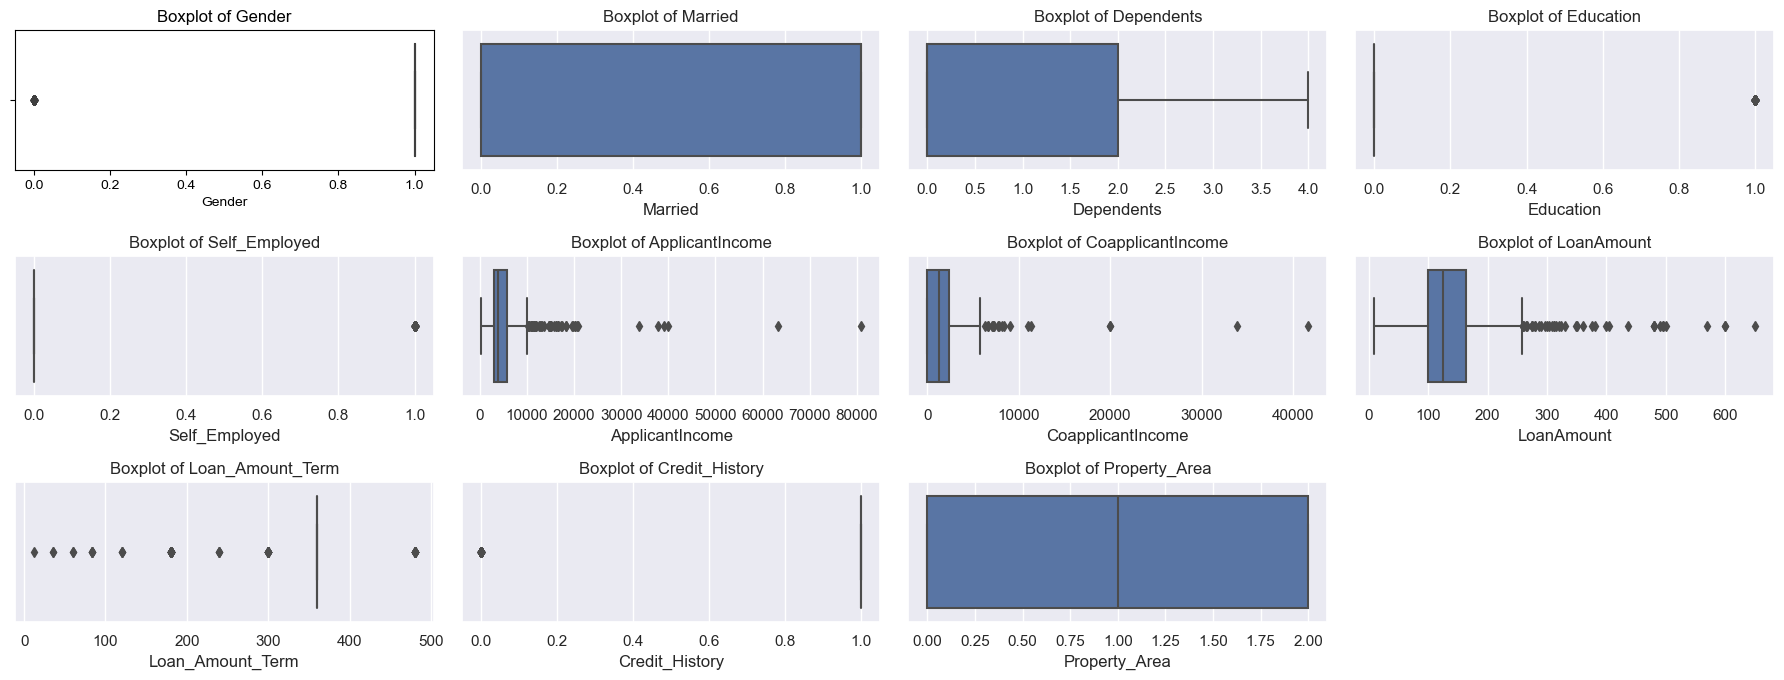

In [136]:
feautures=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
plt.figure(figsize=(18,11))
for i,j in zip(range(1,18),feautures):
    plt.subplot(5,4,i)
    sns.boxplot(data=df,x=j)
    plt.tight_layout()
    sns.set_theme()
    plt.title('Boxplot of {}'.format(j))

I have identified outliers in the following variables: Gender, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

### Remove Outliers

In [148]:
df1 = df.copy()
def remove_outliers_IQR (col):
    percentile25 =df1[col].quantile (0.25)
    percentile75 = df1[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 *iqr
    lower_limit = percentile25 - 1.5* iqr
    print("Upper limit", upper_limit)
    print("Lower limit", lower_limit)
    df1[col]=np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit, lower_limit,df1[col]))
    return df1[df1[col]> upper_limit]

In [149]:
remove_outliers_IQR('Gender')

Upper limit 1.0
Lower limit 1.0


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [150]:
remove_outliers_IQR('Education')

Upper limit 0.0
Lower limit 0.0


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [151]:
remove_outliers_IQR('Self_Employed')

Upper limit 0.0
Lower limit 0.0


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [152]:
remove_outliers_IQR('ApplicantIncome')

Upper limit 10048.75
Lower limit -1425.25


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [153]:
remove_outliers_IQR('CoapplicantIncome')

Upper limit 5810.0
Lower limit -3486.0


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [154]:
remove_outliers_IQR('LoanAmount')

Upper limit 258.75
Lower limit 4.75


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [155]:
remove_outliers_IQR('Loan_Amount_Term')

Upper limit 360.0
Lower limit 360.0


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [156]:
remove_outliers_IQR('Credit_History')

Upper limit 1.0
Lower limit 1.0


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


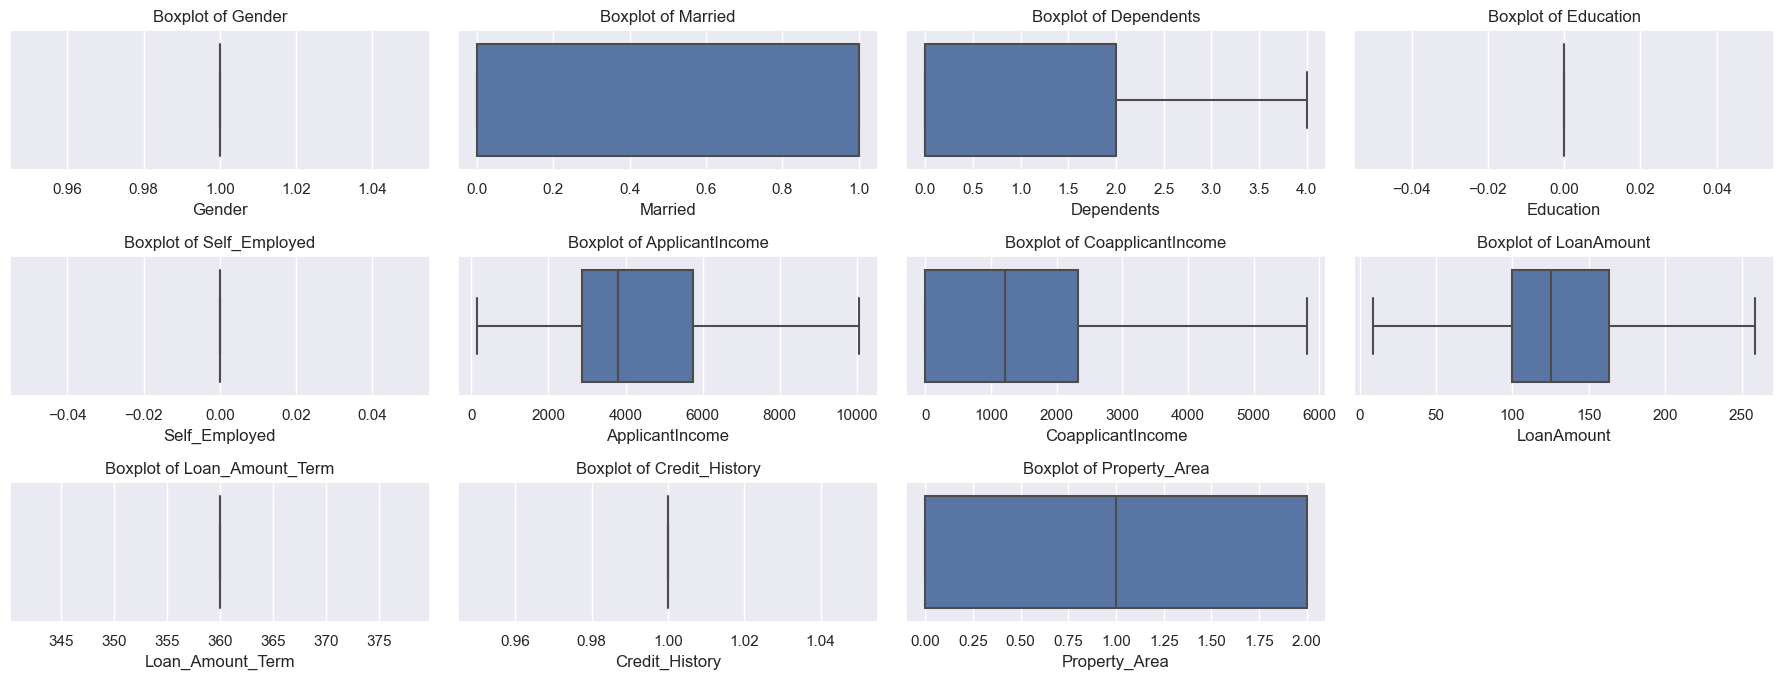

In [158]:
feautures=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
plt.figure(figsize=(18,11))
for i,j in zip(range(1,18),feautures):
    plt.subplot(5,4,i)
    sns.boxplot(data=df1,x=j)
    plt.tight_layout()
    sns.set_theme()
    plt.title('Boxplot of {}'.format(j))

In [159]:
X=df1.iloc[:,:-1]

In [160]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0,0,0.0,0.0,5849.0,0.0,120.0,360.0,1.0,2
1,1.0,1,1,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0
2,1.0,1,0,0.0,0.0,3000.0,0.0,66.0,360.0,1.0,2
3,1.0,1,0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2
4,1.0,0,0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
593,1.0,0,0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,0
594,1.0,1,3,0.0,0.0,4106.0,0.0,40.0,360.0,1.0,0
595,1.0,1,1,0.0,0.0,8072.0,240.0,253.0,360.0,1.0,2
596,1.0,1,2,0.0,0.0,7583.0,0.0,187.0,360.0,1.0,2


In [161]:
Y=df1.iloc[:,-1]

In [162]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
593    1
594    1
595    1
596    1
597    0
Name: Loan_Status, Length: 598, dtype: int32

In [163]:
mms=MinMaxScaler()

In [164]:
X_sc=mms.fit_transform(X)
X_sc

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.25, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.  , 1.  , 0.25, ..., 0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.5 , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.5 ]])

In [166]:
X_trainor,X_testor,y_trainor,y_testor=train_test_split(X,Y,test_size=0.2,random_state=45)

In [167]:
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC()
nb=GaussianNB()
dc=DecisionTreeClassifier(criterion='entropy')
ad=AdaBoostClassifier()
gr=GradientBoostingClassifier()
xg=XGBClassifier()
score3=[]
models=[knn,svm,nb,dc,ad,gr,xg]

In [168]:
for model in models:
    print('-'*25,model,'-'*25)
    model.fit(X_trainpca,y_train)
    y_predpca=model.predict(X_testpca)
    print(classification_report(y_test,y_pred))
    model_score=accuracy_score(y_test,y_predpca)*100
    print("Score model = {}".format(model_score))
    score3.append(model_score)

------------------------- KNeighborsClassifier() -------------------------
              precision    recall  f1-score   support

           0       0.77      0.42      0.54        48
           1       0.70      0.92      0.80        72

    accuracy                           0.72       120
   macro avg       0.74      0.67      0.67       120
weighted avg       0.73      0.72      0.69       120

Score model = 61.66666666666667
------------------------- SVC() -------------------------
              precision    recall  f1-score   support

           0       0.77      0.42      0.54        48
           1       0.70      0.92      0.80        72

    accuracy                           0.72       120
   macro avg       0.74      0.67      0.67       120
weighted avg       0.73      0.72      0.69       120

Score model = 59.166666666666664
------------------------- GaussianNB() -------------------------
              precision    recall  f1-score   support

           0       0.77     

### Combaring Accuracy

In [169]:
Algorithm=[' KNeighborsClassifier','svc','Naive','DecisionTree','AdaBoostClassifier','GradientBoosting','XGBClassifier']
Accuracy=score3
Data1=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy},index=[1,2,3,4,5,6,7])
Data1.style.highlight_max(subset='Accuracy',color='lightgreen')

,Algorithm,Accuracy
1,KNeighborsClassifier,61.666667
2,svc,59.166667
3,Naive,59.166667
4,DecisionTree,60.000000
5,AdaBoostClassifier,57.500000
6,GradientBoosting,64.166667
7,XGBClassifier,60.000000


In [177]:
Algorithm=[' KNeighborsClassifier','svc','Naive','DecisionTree','AdaBoostClassifier','GradientBoosting','XGBClassifier']
Accuracy=score
Accuracy1=score1
Accuracy2=score2
Accuracy3=score3
Data1=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy,'Balancing':Accuracy1,'PCA':Accuracy2,'Outlier':Accuracy3},index=[1,2,3,4,5,6,7])
Data1.style.highlight_max(subset='Balancing',color='lightgreen')

,Algorithm,Accuracy,Balancing,PCA,Outlier
1,KNeighborsClassifier,73.333333,94.444444,61.666667,61.666667
2,svc,74.166667,87.777778,59.166667,59.166667
3,Naive,75.000000,87.777778,59.166667,59.166667
4,DecisionTree,61.666667,95.555556,56.666667,60.000000
5,AdaBoostClassifier,75.000000,90.000000,57.500000,57.500000
6,GradientBoosting,68.333333,92.222222,64.166667,64.166667
7,XGBClassifier,71.666667,94.444444,60.000000,60.000000


### Save The Good Acuuracy Model

In [178]:
import joblib
joblib.dump(dc,'loan_status_predict')

['loan_status_predict']

In [179]:
model = joblib.load('loan_status_predict')

### New Data For Prediction

In [182]:
new=pd.DataFrame({
'Gender':0,
'Married':1,
'Dependents':2,
'Education':0,
'Self_Employed':1,
'ApplicantIncome':2869,
'CoapplicantIncome':0.0,
'LoanAmount':35,
'Loan_Amount_Term':140,
},index=[0])

In [183]:
new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0,1,2,0,1,2869,0.0,35,140


In [184]:
result=model.predict(new)

C:\Users\ismail\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


### New Prediction

In [185]:
if result==1:
    print('Loan Approved')
else:
    print('Loan Not Approved')

Loan Not Approved
